### **Data Analysis**
Data visualizations  
(Unsupervised) k-means cluster classification  
TA:  
If you're looking to explore the relationship between countries, and cluster similar countries with voting patterns together, then I think maybe K-means clustering (which is another machine learning algorithm) might be a good way of finding clusters in the existing dataset, try looking into that! Of course, you know what your project is, not me, so if you think your plan with KNN is going okay, then that's okay too. If not, then that's something thing that you can write about in your notebook. ("we tried doing K nearest neighbors at first but it didn't work the way we wanted it to because ....")

In [224]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

res_df = pd.read_csv('all_res_data.csv')
votes_df = pd.read_csv('all_voting_data.csv')

In [225]:
# sort Res ID in order of year

year_unique = res_df['Year'].unique()
year_unique.sort()

sorted_res_df = res_df.sort_values(by=['Year'])
sorted_res_df = sorted_res_df.reset_index(drop=True)
# print(sorted_res_df.head(10))

sorted_res_ID = sorted_res_df['Resolution ID']
sorted_res_ID.head(10)

year_counter = 1983
# # each chunk starts at chunk__
#chunk2018 has 2018-2021 only 4 years
chunk1983 = sorted_res_df.loc[sorted_res_df['Year'].isin(range(1983, 1988))]
chunk1988 = sorted_res_df.loc[sorted_res_df['Year'].isin(range(1988, 1993))]
chunk1993 = sorted_res_df.loc[sorted_res_df['Year'].isin(range(1993, 1998))]
chunk1998 = sorted_res_df.loc[sorted_res_df['Year'].isin(range(1998, 2003))]
chunk2003 = sorted_res_df.loc[sorted_res_df['Year'].isin(range(2003, 2008))]
chunk2008 = sorted_res_df.loc[sorted_res_df['Year'].isin(range(2008, 2013))]
chunk2013 = sorted_res_df.loc[sorted_res_df['Year'].isin(range(2013, 2018))]
chunk2018  = sorted_res_df.loc[sorted_res_df['Year'].isin(range(2018, 2021))]

display(chunk2018)

TypeError: 'DataFrame' object is not callable

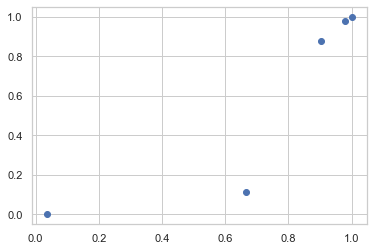

In [226]:
#K MEANS CLUSTERING UPDATE

chosen_res = chunk1983['Resolution ID']
df1983 = pd.DataFrame()

df1983.insert(loc=0, column='Country', value = votes_df['country'])
col_count = 1
for res in chosen_res:
    each_res_vote = votes_df[res].tolist()
    df1983.insert(loc=col_count, column= res, value = each_res_vote)
    col_count = col_count + 1

df1983 = df1983.replace('Y', 1)
df1983 = df1983.replace('N', -1) 
df1983 = df1983.replace('A', 0)
df1983 = df1983.replace('NP', 0)
df1983 = df1983.fillna(0)

kmeans = KMeans(n_clusters=5, random_state=0) 
# kmeans.fit(df1983.iloc[:, 2:col_count])
# kmeans.labels_
label = kmeans.fit_predict(df1983.iloc[:, 1:col_count])
 
#group 1
filtered_label0 = df1983[label == 0]
 
filtered_label0
#plotting the results
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1] )
plt.show()

# ALL Groups
# u_labels = np.unique(label)
# for i in u_labels:
#     plt.scatter(df1983[label == i , 0] , df1983[label == i , 1] , label = i)
# plt.legend()
# plt.show()



In [101]:
# all votes by year to plot all data
# had to do some data wrangling
scat_country = votes_df['country'].tolist()
column_names = ["year", "vote", "country"]
scat_df = pd.DataFrame(columns = column_names)

for res in res_df["Resolution ID"]:
    each_res_vote = votes_df[res].tolist()
    year_of_res = res_df.loc[res_df['Resolution ID'] == res, 'Year'].iloc[0]
    rep_year = [year_of_res for i in range(208)]
    
    data = {'year': rep_year,
           'vote': each_res_vote,
           'country': scat_country}
    df2 = pd.DataFrame(data)
    scat_df = pd.concat([scat_df, df2])

# setting categorical values to numbers in order to showcase the data
scat_replacenum_df = scat_df.replace('Y', 40) # Y = 40
scat_replacenum_df = scat_replacenum_df.replace('N', 30) # N = 30 
scat_replacenum_df = scat_replacenum_df.replace('A', 20) # A = 20
scat_replacenum_df = scat_replacenum_df.replace('NP', 10) # NP = 10
scat_replacenum_df = scat_replacenum_df.fillna(0) # NaN = 0

display(scat_replacenum_df)

,year,vote,country
0,2021,40.0,AFGHANISTAN
1,2021,30.0,ALBANIA
2,2021,40.0,ALGERIA
3,2021,30.0,ANDORRA
4,2021,40.0,ANGOLA
...,...,...,...
203,2018,0.0,CZECHOSLOVAKIA
204,2018,0.0,DEMOCRATIC YEMEN
205,2018,0.0,GERMAN DEMOCRATIC REPUBLIC
206,2018,0.0,"GERMANY, FEDERAL REPUBLIC OF"


Text(0.5, 6.79999999999999, 'Vote')

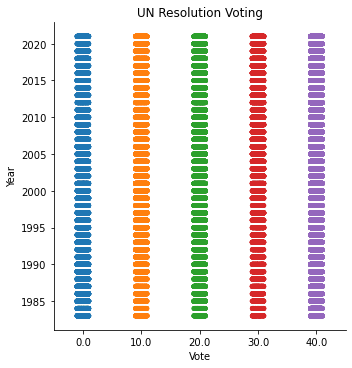

In [94]:
# tries plotting all of our data in a scatter plot
# sheer number of total data points (207584) makes scatter plot a bad visualization
#want to split data and look at only certain sets
titles = ['UN Resolution Voting']
all_data_scat = sns.catplot(data=scat_df, x="vote", y="year")
for all_data_scat,title in zip(all_data_scat.axes.flatten(),titles):
    all_data_scat.set_title(title)
all_data_scat.set_ylabel("Year")
all_data_scat.set_xlabel("Vote")

<AxesSubplot:xlabel='year', ylabel='vote'>

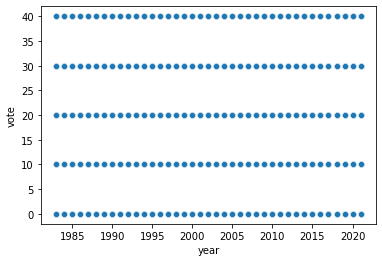

In [91]:
# similar result of the axis is different, the plot does not give any information
sns.scatterplot(data=scat_df, x="year", y="vote")

In [16]:
# choose res from every 5 years


Text(0.5, 6.79999999999999, 'Vote')

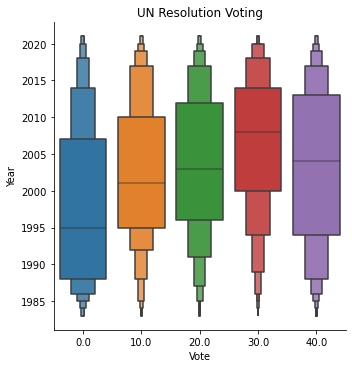

In [95]:
#all data but in different type of plot shows distribution slightly better

# USE THIS FOR ONLY NATION DID NOT EXIST  TO SHOW THAT MORE DID NOT EXIST IN THE PAST *******************************
titles = ['UN Resolution Voting']

all_data_box = sns.catplot(data=scat_df, x="vote", y="year", kind='boxen')
for all_data_box,title in zip(all_data_box.axes.flatten(),titles):
    all_data_box.set_title(title)
all_data_box.set_ylabel("Year")
all_data_box.set_xlabel("Vote")

Text(0.5, 6.79999999999999, 'Vote')

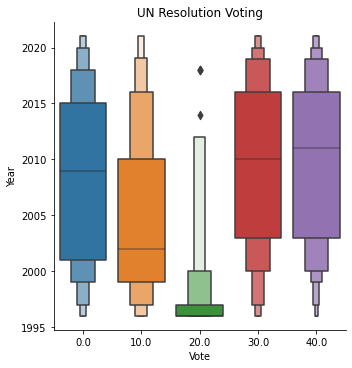

In [100]:
# choose 1 same res over the years
res_name = "Human rights and unilateral coercive measures : resolution / adopted by the General Assembly"

chosen_res = res_df.loc[res_df['Resolution Name'] == res_name, 'Resolution ID']
scat2_df = pd.DataFrame(columns = column_names)

for res in chosen_res:
    each_res_vote = votes_df[res].tolist()
    
    year_of_res = res_df.loc[res_df['Resolution ID'] == res, 'Year'].iloc[0]
    rep_year = [year_of_res for i in range(208)]
    
    data2 = {'year': rep_year,
             'vote': each_res_vote,
             'country': scat_country}
    df3 = pd.DataFrame(data2)
    scat2_df = pd.concat([scat2_df, df3])

scat2_df = scat2_df.replace('Y', 40) # Y = 40
scat2_df = scat2_df.replace('N', 30) # N = 30 
scat2_df = scat2_df.replace('A', 20) # A = 20
scat2_df = scat2_df.replace('NP', 10) # NP = 10
scat2_df = scat2_df.fillna(0) # NaN = 0

# also tries kind = swarm but still too many points
# kind = boxen, violin
one_res_box = sns.catplot(data=scat2_df, x="vote", y="year", kind='boxen')
for one_res_box,title in zip(one_res_box.axes.flatten(),titles):
    one_res_box.set_title(title)
one_res_box.set_ylabel("Year")
one_res_box.set_xlabel("Vote")

K-Means clustering

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

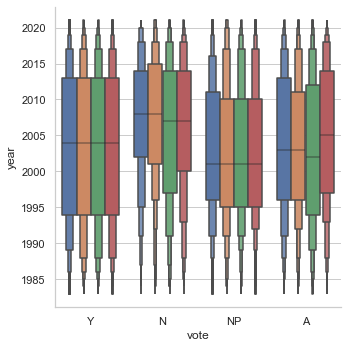

In [152]:
import warnings
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore') 
le = LabelEncoder()

# X = scat_df.iloc[:,1:2] 
# X['vote'] = le.fit_transform(X['vote'])

# Y = scat_df['year']
# Y = le.transform(Y)
# kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

# X = scat_replacenum_df.iloc[:,1:2] 
# Y = scat_replacenum_df['year']
# kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

X = scat_replacenum_df
X['country'] = le.fit_transform(X['country'])
Y = scat_replacenum_df['year']
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

identified_clusters = kmeans.fit_predict(X)

data_w_clusters = scat_df.copy()
data_w_clusters['Clusters'] = identified_clusters 
# plt.scatter(data_with_clusters['vote'],data_with_clusters['year'],c = data_with_clusters['Clusters'],cmap='rainbow')

# ISSUE caused by this line but still plots
# can use kind = box or boxen
kmc_scat = sns.catplot(data = data_w_clusters, x="vote", y="year", hue = data_w_clusters['Clusters'], kind = 'boxen')

titles = ['UN Resolution Voting Clusters']
for kmc_scat,title in zip(kmc_scat.axes.flatten(),titles):
    kmc_scat.set_title(title)
kmc_scat.set_ylabel("Year")
kmc_scat.set_xlabel("Vote")

#### Droping A and NP and NaN from dataframes

each country = one data point


In [157]:

dropped_votes_df = votes_df.replace('Y', 1) 
dropped_votes_df = dropped_votes_df.replace('N', 0) 
dropped_votes_df = dropped_votes_df.replace('A', np.NaN) 
dropped_votes_df = dropped_votes_df.replace('NP', np.NaN) 
# scat2_df = scat2_df.fillna(0) # NaN = 0

display(dropped_votes_df)

# sorted_res_ID has all res sorted by year
# put res of every 5 years in an array like 

,country,A/RES/76/161,A/RES/76/160,A/RES/76/155,A/RES/76/166,A/RES/76/165,A/RES/76/163,A/RES/76/162,A/RES/76/175,A/RES/75/182,...,A/RES/40/197,A/RES/39/167,A/RES/57/5,A/RES/55/6,A/RES/53/10,A/RES/51/22,A/RES/75/284,A/RES/75/260,A/RES/75/130,A/RES/73/132
0,AFGHANISTAN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
1,ALBANIA,0.0,0.0,1.0,1.0,0.0,NaN,0.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0
2,ALGERIA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
3,ANDORRA,0.0,0.0,1.0,1.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0
4,ANGOLA,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,CZECHOSLOVAKIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,DEMOCRATIC YEMEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,GERMAN DEMOCRATIC REPUBLIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,"GERMANY, FEDERAL REPUBLIC OF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
